<a href="https://colab.research.google.com/github/tuxsy/iebs-master-data-science/blob/main/m06/c3/AdaBoostClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este ejemplo vamos a mostrar como emplear el algoritmo AdaBoost para tareas de clasificación. Para ello, vamos a generar una serie de datos sitéticos, y generar una serie de clasificaciones empleando la clase `AdaBoostClassifier()`. 

Recordemos que este algoritmo es recursivo, intentando disminuir el error de predicción a medida que incrementamos los pasos del mismo. Esto se puede verificar en el gráfico de salida que se muestra al final del notebook.

**NOTA**: debido a las características del código creado y a la naturaleza recursiva del algoritmo, la ejecución tarda un poco, así que paciencia! 😀

In [ ]:
### Clasificador Adaboost

## Importamos librerias
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score


Generamos los datos sintéticos en función de los parámetros especificados, y dividimos el conjunto generado en train y test.

In [ ]:
# Generamos los datos
X, y = make_classification(n_samples=4000, n_features=10, n_informative=5, n_redundant=5,
n_classes=4, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Ajustamos el modelo Adaboost a los datos generados, empleando como clasificador débil o weak learner a los árboles de decisión. 

In [ ]:
## Adaptador Adaboost
bdt_real=AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),
                            n_estimators=600,learning_rate=1) 
# El clasificador débil es un árbol de decisiones que produce 600 clasificadores débiles
bdt_real.fit(X_train,y_train)
n_tree=len(bdt_real) 
print("El número de árboles empleados en el ensemble es: ", n_tree) # El número de árboles es 600

El número de árboles empleados en el ensemble es:  600


In [ ]:
## Precisión promedio de predicción del clasificador
scores=cross_val_score(bdt_real,X_test,y_test)
print("Precisión media de la predicción del clasificador:",scores.mean())

Precisión media de la predicción del clasificador: 0.7674242424242423


En el siguiente gráfico vamos a ver cómo evoluciona el error en el conjunto de test a medida que vamos añadiendo más árboles al ensemble. Del mismo se puede deducir que a medida que avanzamos en el número de iteraciones, el error disminuye, hasta llegar a aproximadamente 500 árboles. A partir de este punto el error no solo deja de reducirse sino que incluso aumenta, lo cual puede ser un idicador de que llegado a un punto, no es necesario seguir ajustando más árboles de decisión.

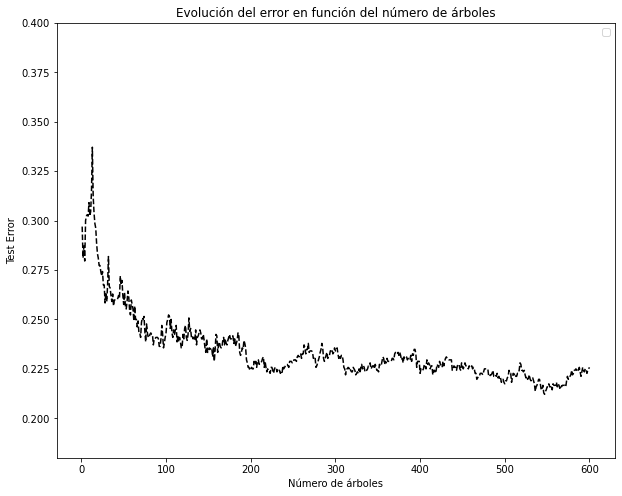

In [ ]:
## Conjunto de datos de predicción y dibujo de tasa de error
real_test_errors=[]
for y_predict in bdt_real.staged_predict(X_test): 
    #La forma de datos de # bdt_real.staged_predict (x_test) es un generador, aquí se generan 600 generadores,
    #Ese es el resultado de la predicción formado por 600 árboles de decisión generados por 600 iteraciones
    real_test_errors.append(1.-accuracy_score(y_predict,y_test))
plt.figure(figsize=(10,8))
plt.plot(range(1,n_tree+1),real_test_errors,c='black',linestyle='dashed')
plt.legend()
plt.ylim(0.18,0.40)
plt.ylabel('Test Error')
plt.xlabel('Número de árboles')
plt.title('Evolución del error en función del número de árboles')
plt.show()